# 第6章: 英語テキストの処理

英語のテキスト（nlp.txt）に対して，以下の処理を実行せよ．

In [1]:
text_list = []

with open('./data/chapter06/nlp.txt', 'r') as f:
    text_list = f.read().splitlines()

text_list[:10]

['Natural language processing',
 'From Wikipedia, the free encyclopedia',
 '',
 'Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.',
 '',
 'History',
 '',
 'The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.',
 '',
 'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or f

### 50. 文区切り

(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

In [2]:
import re

sentences = []

for lst in text_list:
    sentence = re.split('[.:;?!]\s([A-Z])', lst)
    sentences = sentences + sentence

for i,j in enumerate(sentences):
    if re.match(r"^[A-Z]$", j):
        sentences.insert(i+2, "".join([sentences[i], sentences[i+1]]))
        del sentences[i]
        del sentences[i]

sentences[:10]

['Natural language processing',
 'From Wikipedia, the free encyclopedia',
 '',
 'Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages',
 'As such, NLP is related to the area of humani-computer interaction',
 'Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.',
 '',
 'History',
 '',
 'The history of NLP generally starts in the 1950s, although work can be found from earlier periods']

### 51. 単語の切り出し

空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [3]:
for i in sentences[:5]:
    print("\n".join(i.split(" ")))

Natural
language
processing
From
Wikipedia,
the
free
encyclopedia

Natural
language
processing
(NLP)
is
a
field
of
computer
science,
artificial
intelligence,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
(natural)
languages
As
such,
NLP
is
related
to
the
area
of
humani-computer
interaction


### 52. ステミング

51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装としてstemmingモジュールを利用するとよい．

In [4]:
from nltk import stem

# nltkにはPorterStemmerもついててお買い得!!!
stemmer = stem.PorterStemmer()

for i in sentences[:5]:
    for j in i.split(" "):
        print("%s\t%s" % (j, stemmer.stem(j)))

Natural	natur
language	languag
processing	process
From	from
Wikipedia,	wikipedia,
the	the
free	free
encyclopedia	encyclopedia
	
Natural	natur
language	languag
processing	process
(NLP)	(nlp)
is	is
a	a
field	field
of	of
computer	comput
science,	science,
artificial	artifici
intelligence,	intelligence,
and	and
linguistics	linguist
concerned	concern
with	with
the	the
interactions	interact
between	between
computers	comput
and	and
human	human
(natural)	(natural)
languages	languag
As	As
such,	such,
NLP	nlp
is	is
related	relat
to	to
the	the
area	area
of	of
humani-computer	humani-comput
interaction	interact


### 53. Tokenization

Stanford Core NLPを用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [5]:
# corenlpまで実装されてて神
from nltk.parse import corenlp

# corenlp本体はサーバーとして動かしてる
# DockerですよDocker!!!
parser = corenlp.CoreNLPDependencyParser(url='http://corenlp:9000')

for sentence in parser.parse_text("\n".join(text_list[:4])):
    # 以下のテンプレートでprintされる
    # {i}\t{word}\t{lemma}\t{ctag}\t{tag}\t{feats}\t{head}\t{rel}\t_\t_\n
    print(sentence.to_conll(10))

1	Natural	natural	JJ	JJ	_	2	amod	_	_
2	language	language	NN	NN	_	3	compound	_	_
3	processing	processing	NN	NN	_	18	nsubj	_	_
4	From	from	IN	IN	_	5	case	_	_
5	Wikipedia	Wikipedia	NNP	NNP	_	3	nmod	_	_
6	,	,	,	,	_	3	punct	_	_
7	the	the	DT	DT	_	14	det	_	_
8	free	free	JJ	JJ	_	9	amod	_	_
9	encyclopedia	encyclopedia	NN	NN	_	12	compound	_	_
10	Natural	natural	JJ	JJ	_	11	amod	_	_
11	language	language	NN	NN	_	12	compound	_	_
12	processing	processing	NN	NN	_	14	dep	_	_
13	(	(	-LRB-	-LRB-	_	14	punct	_	_
14	NLP	nlp	NN	NN	_	3	appos	_	_
15	)	)	-RRB-	-RRB-	_	18	punct	_	_
16	is	be	VBZ	VBZ	_	18	cop	_	_
17	a	a	DT	DT	_	18	det	_	_
18	field	field	NN	NN	_	0	ROOT	_	_
19	of	of	IN	IN	_	21	case	_	_
20	computer	computer	NN	NN	_	21	compound	_	_
21	science	science	NN	NN	_	18	nmod	_	_
22	,	,	,	,	_	21	punct	_	_
23	artificial	artificial	JJ	JJ	_	24	amod	_	_
24	intelligence	intelligence	NN	NN	_	21	conj	_	_
25	,	,	,	,	_	21	punct	_	_
26	and	and	CC	CC	_	27	cc	_	_
27	linguistics	linguistics	NNS	NNS	_	21	conj	_	_
28	concerne

### 54. 品詞タグ付け

Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [6]:
for word in parser.parse_text("\n".join(text_list[:4])):
    dep_graphs = word.to_conll(10).splitlines()
    for i in dep_graphs:
        graph = i.split("\t")
        # {i}\t{word}\t{lemma}\t{ctag}\t{tag}\t{feats}\t{head}\t{rel}\t_\t_\n
        print("\t".join([graph[1], graph[2], graph[4]]))

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
,	,	,
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ
language	language	NN
processing	processing	NN
(	(	-LRB-
NLP	nlp	NN
)	)	-RRB-
is	be	VBZ
a	a	DT
field	field	NN
of	of	IN
computer	computer	NN
science	science	NN
,	,	,
artificial	artificial	JJ
intelligence	intelligence	NN
,	,	,
and	and	CC
linguistics	linguistics	NNS
concerned	concern	VBN
with	with	IN
the	the	DT
interactions	interaction	NNS
between	between	IN
computers	computer	NNS
and	and	CC
human	human	JJ
(	(	-LRB-
natural	natural	JJ
)	)	-RRB-
languages	language	NNS
.	.	.
As	as	IN
such	such	JJ
,	,	,
NLP	nlp	NN
is	be	VBZ
related	relate	VBN
to	to	IN
the	the	DT
area	area	NN
of	of	IN
humani	humani	JJ
-	-	HYPH
computer	computer	NN
interaction	interaction	NN
.	.	.
Many	many	JJ
challenges	challenge	NNS
in	in	IN
NLP	nlp	NN
involve	involve	VBP
natural	natural	JJ
language	language	NN
understanding	understanding	NN
,	,	,
t

### 55. 固有表現抽出

入力文中の人名をすべて抜き出せ．

In [7]:
from nltk.parse import CoreNLPParser

tagger = CoreNLPParser(url='http://corenlp:9000', tagtype='ner')
tagger.tag("Wikipedia is the free encyclopedia.".split(" "))

[('Wikipedia', 'ORGANIZATION'),
 ('is', 'O'),
 ('the', 'O'),
 ('free', 'O'),
 ('encyclopedia', 'O'),
 ('.', 'O')]

In [8]:
[ word[0] for word in tagger.tag(sentences) if word[1] == 'PERSON']

['Alan',
 'Turing',
 'Joseph',
 'Weizenbaum',
 'MARGIE',
 'Schank',
 'Wilensky',
 'Meehan',
 'Lehnert',
 'Carbonell',
 'Lehnert',
 'Racter',
 'Jabberwacky',
 'Moore']

### 56. 共参照解析

Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

### 57. 係り受け解析

Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

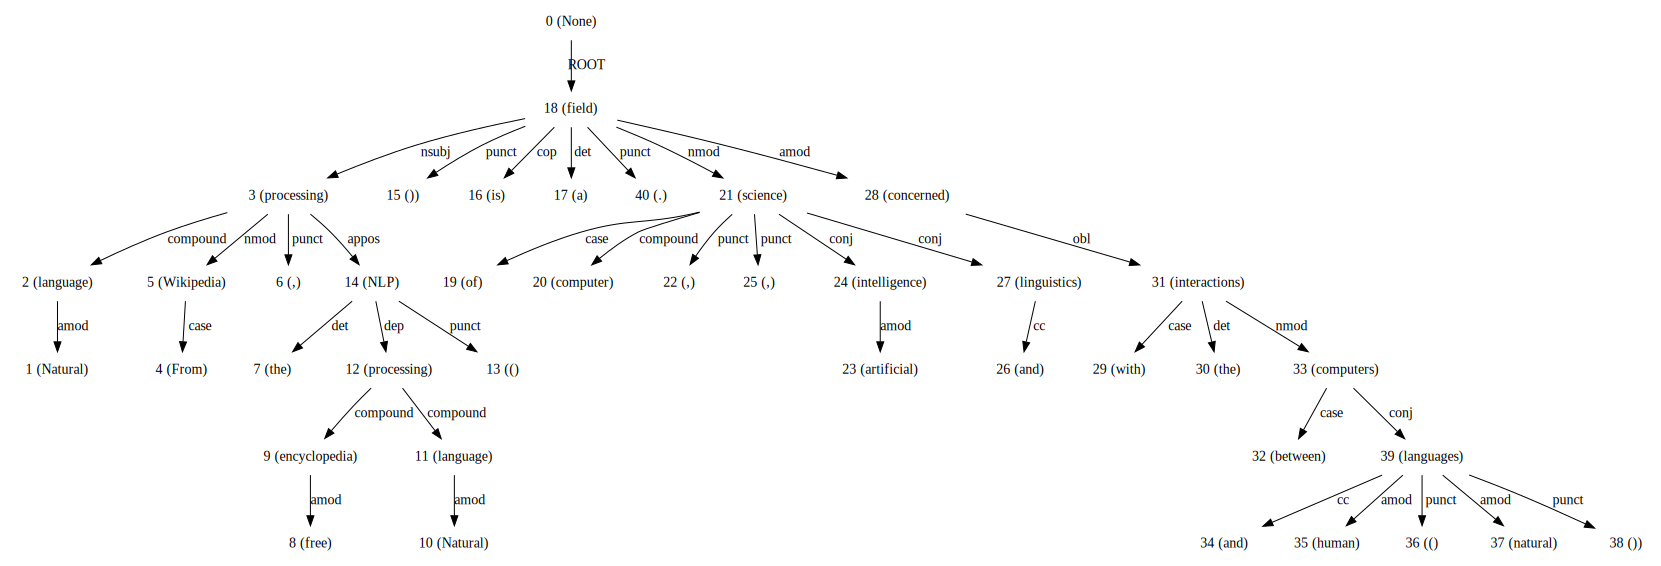

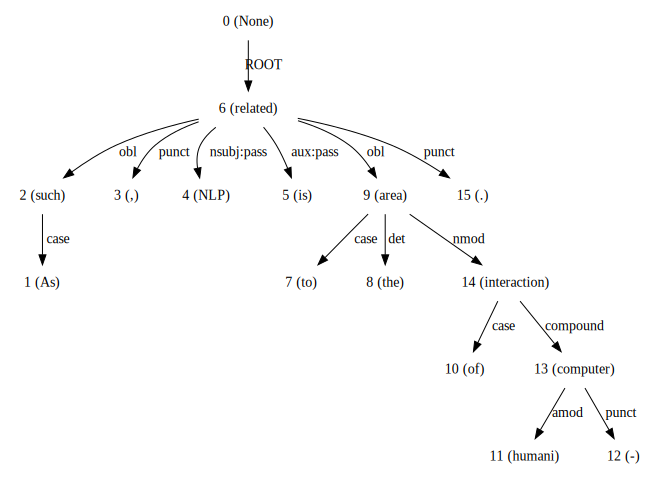

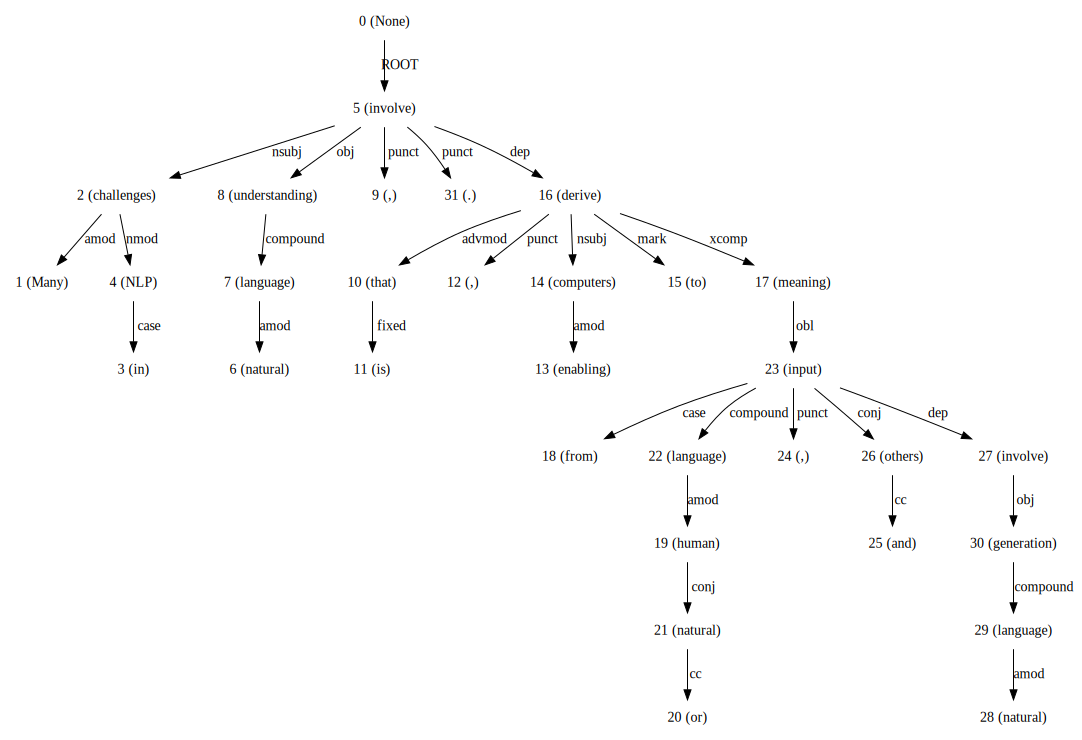

In [9]:
import pydot
from IPython.display import SVG, display

for sentence in parser.parse_text("\n".join(text_list[:4])):
    display(SVG(pydot.graph_from_dot_data(sentence.to_dot())[0].create(format='svg')))

### 58. タプルの抽出

Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．

- 述語: nsubj関係とdobj関係の子（dependant）を持つ単語
- 主語: 述語からnsubj関係にある子（dependent）
- 目的語: 述語からdobj関係にある子（dependent）

In [10]:
result = parser.parse_text("Wikipedia is the free encyclopedia.")
# triplesを使うと依存関係の語がtupleで抽出される
list(next(result).triples())

[(('encyclopedia', 'NN'), 'nsubj', ('Wikipedia', 'NNP')),
 (('encyclopedia', 'NN'), 'cop', ('is', 'VBZ')),
 (('encyclopedia', 'NN'), 'det', ('the', 'DT')),
 (('encyclopedia', 'NN'), 'amod', ('free', 'JJ')),
 (('encyclopedia', 'NN'), 'punct', ('.', '.'))]

In [11]:
for sentence in parser.parse_text("\n".join(text_list)):
    # 主語と述語のtuple -> (主語, 述語)
    dep = ('', '')
    for i in list(sentence.triples()):
        if i[1] == 'nsubj':
            dep = (i[2][0], i[0][0])
            continue

        if i[0][0] == dep[1] and i[1] == 'obj':
            print("%s\t%s\t%s" % (dep[0], dep[1], i[2][0]))
        
        word = ('', '')

challenges	involve	understanding
Turing	published	article
ELIZA	provided	interaction
patient	exceeded	base
ELIZA	provide	response
underpinnings	discouraged	sort
that	underlies	approach
Some	produced	systems
which	make	decisions
that	contains	errors
implementations	involved	coding
Some	produced	systems
which	make	decisions
models	have	advantage
they	express	certainty
Systems	have	advantages
procedures	make	use
that	make	decisions
language	understand	more


### 59. S式の解析

Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．